# Running Code in the IPython Notebook

First and foremost, the IPython Notebook is an interactive environment for writing and running Python code.

## Code cells allow you to enter and run Python code

Run a code cell using `Shift-Enter` or pressing the "Play" button in the toolbar above:

In [1]:
a = 10

In [ ]:
print(a)

10


## Managing the IPython Kernel

Code is run in a separate process called the IPython Kernel.  The Kernel can be interrupted or restarted.  Try running the following cell and then hit the "Stop" button in the toolbar above.

In [1]:
import time
time.sleep(10)

If the Kernel dies you will be prompted to restart it. Here we call the low-level system libc.time routine with the wrong argument via
ctypes to segfault the Python interpreter:

In [ ]:
import sys
from ctypes import CDLL
# This will crash a Linux or Mac system; equivalent calls can be made on Windows
dll = 'dylib' if sys.platform == 'darwin' else 'so.6'
libc = CDLL("libc.%s" % dll) 
libc.time(-1)  # BOOM!!

## All of the goodness of IPython works

Here are two system aliases:

In [4]:
pwd

'g:\\Mi unidad\\Actuales\\Docente-MaterialesProgramación\\ipynb-examples'

In [2]:
ls

 El volumen de la unidad G es Google Drive
 El n�mero de serie del volumen es: 1983-1116

 Directorio de g:\Mi unidad\Actuales\Docente-MaterialesProgramaci�n\ipynb-examples

30/03/2023  08:50    <DIR>          .
30/03/2023  08:29    <DIR>          ..
30/10/2013  06:33            11.903 animation.m4v
30/03/2023  08:33             5.336 Animations_Using_clear_output.ipynb
30/03/2023  08:34            36.764 Cell_Magics.ipynb
30/03/2023  08:51    <DIR>          copiabuena
30/03/2023  08:34            16.567 Custom_Display_Logic.ipynb
30/03/2023  08:34             8.194 Cython_Magics.ipynb
30/03/2023  08:35             6.823 Data_Publication_API.ipynb
30/03/2023  08:35            10.617 Frontend_Kernel_Model.ipynb
30/03/2023  08:35            19.337 Importing_Notebooks.ipynb
30/03/2023  08:52    <DIR>          logo
30/03/2023  08:36             6.468 Octave_Magic.ipynb
30/03/2023  08:44            12.025 Part_1_Running_Code.ipynb
30/03/2023  08:36            62.484 Part_2_Basic_Output.ipyn

Any command line program can be run using `!` with string interpolation from Python variables:

In [5]:
message = 'The IPython notebook is great!'
# note: the echo command does not run on Windows, it's a unix command.
!echo $message

The IPython notebook is great!


Tab completion works:

In [ ]:
import numpy
numpy.random.

Tab completion after `(` brings up a tooltip with the docstring:

In [ ]:
numpy.random.rand(

Adding `?` opens the docstring in the pager below:

In [ ]:
magic?

Exceptions are formatted nicely:

In [ ]:
x = 1
y = 4
z = y/(1-x)

## Working with external code

There are a number of ways of getting external code into code cells.

Pasting code with `>>>` prompts works as expected:

In [11]:
>>> the_world_is_flat = 1
>>> if the_world_is_flat:
...     print("Be careful not to fall off!")

Be careful not to fall off!


The `%load` magic lets you load code from URLs or local files:

In [ ]:
%load?

In [ ]:
%matplotlib inline

In [ ]:
%load http://matplotlib.sourceforge.net/mpl_examples/pylab_examples/integral_demo.py

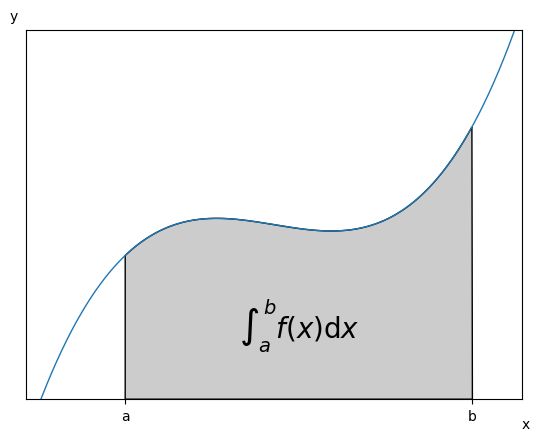

In [12]:
#!/usr/bin/env python

# implement the example graphs/integral from pyx
from pylab import *
from matplotlib.patches import Polygon

def func(x):
    return (x-3)*(x-5)*(x-7)+85

ax = subplot(111)

a, b = 2, 9 # integral area
x = arange(0, 10, 0.01)
y = func(x)
plot(x, y, linewidth=1)

# make the shaded region
ix = arange(a, b, 0.01)
iy = func(ix)
verts = [(a,0)] + list(zip(ix,iy)) + [(b,0)]
poly = Polygon(verts, facecolor='0.8', edgecolor='k')
ax.add_patch(poly)

text(0.5 * (a + b), 30,
     r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center',
     fontsize=20)

axis([0,10, 0, 180])
figtext(0.9, 0.05, 'x')
figtext(0.1, 0.9, 'y')
ax.set_xticks((a,b))
ax.set_xticklabels(('a','b'))
ax.set_yticks([])
show()
